<a href="https://colab.research.google.com/github/alliezom/ISAT_300/blob/main/Copy_of_Lab2_HeartRateLab_StarterCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TobGerken/ISAT300/blob/main/Lab2_HeartRateLab_StarterCode.ipynb)

<font color ='green'>**Allie Zombron, Evan Cooper, Jordan Yang, Lily Harman**

all group members have seen and understood the code</font>

---

# Heart Rate Lab Stater Code


**This notebook is published on my github. It is publicly accessible, but you cannot save your changes to my github. Learning git & github is beyond the scope of this course. If you are familiar with github, you know that to do. If you don't know github, you can save a personal copy of the file to your google drive, so that you can save your changes and can access them at a later date**

This notebook contains elements from previous notebooks

1. [GettingStarted](https://github.com/TobGerken/ISAT300/blob/main/1_GettingStarted.ipynb)
2. [Data Visualization](https://github.com/TobGerken/ISAT300/blob/main/2_DataVisualization.ipynb)
3. [Heart Rate Lab Review](https://github.com/TobGerken/ISAT300/blob/main/3_HeartRateLabReview.ipynb)

and contains code fragments that would be helpful for completing the anaylsis portion for the Heart Rate Lab


## Now lets get started


In this notebook contains code to

- read in the data from a google sheet into pandas
- perform basic statistics on rows and columns in a pandas data frame
- fit and evaluate different mathematical models to experimental data

We have previously covered how make a histogram using pandas. If you don't remember, have a look at the [Data Visualization] lecture (https://github.com/TobGerken/ISAT300/blob/main/2_DataVisualization.ipynb).

**Run the below cell first to load pandas and numpy**

In [ ]:
# running this will import pandas and numpy.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading a google spreadsheet into a dataframe

If you are using google Colab you can easily load data from google sheets, which makes sense since they are both google products. Colab provides the appropriate functions that will authenticate you with google and will then load the google sheet. Doing so will promt a google account logon window.

Executing the cells below, will load the **resting heart rate data** we entered into the google sheet during the lab.

**Note that the below code will only work on Colab! If you chose to work with a different software you can also read a google sheet, but it is more complicated and it might be easier to just download the sheet to your computer as a csv or Excel file that you can then read into a dataframe.**

In [ ]:
from google.colab import auth       # This is the module that allows google to authenticate you
import gspread                      # This is the module to interact with a google sheet.
from google.auth import default     # autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
# This cell opens the google sheet specified in the URL, selects the first sheet,
# reads the data, and put it in a dataframe

# google sheets for our class data (spring 2025)
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1VOGU6gluIqCJS0UEv2doulUL9BaONnW_e0nNlGMUfbw/edit?usp=sharing')

worksheet =gsheets.sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# I am telling python here to use row #1 for the column names and the rest as data
df = pd.DataFrame(rows[2:], columns=rows[1])

# This bit of code is a bit complicated, but in essence I am telling python to treat all columns as numbers rather than objects
cols = list(df.columns) # this produces a list of column names
print(cols)
df[cols] = df[cols].apply(pd.to_numeric) # I now apply a conversion to all columns

print(df.shape)
df.head()

['Subject ID', 'Trial1', 'Trial2', 'Trial3']
(14, 4)


,Subject ID,Trial1,Trial2,Trial3
0,1,60,68,64
1,2,72,64,68
2,3,73,77,77
3,4,67,70,77
4,5,80,83,75


<font color ='purple'> <h2> Part I - Resting Heart Rate


The `describe()` method can always be used to calculate some of the most important descriptive statistics.  

In [ ]:
df.describe()
# Subject ID describe does not tell much

,Subject ID,Trial1,Trial2,Trial3
count,14.0000,14.000000,14.000000,14.000000
mean,7.5000,75.071429,75.928571,76.071429
std,4.1833,14.360546,10.687623,10.095424
min,1.0000,56.000000,60.000000,64.000000
25%,4.2500,62.500000,68.250000,68.000000
50%,7.5000,72.500000,73.000000,76.000000
75%,10.7500,81.500000,83.750000,83.000000
max,14.0000,103.000000,96.000000,96.000000


Howver, there are a lot more available in python. The table below lists the important descriptive statitics functions availabe for a pandas dataframe and their explanations:

    count(): The number of non-empty observations.
    sum(): The sum of the values.
    mean(): The average of the values.
    median(): The median of values.
    mode(): The mode of the values.
    std(): Standard deviation of values.
    skew(): The skewness of the values.
    kurt(): The kurtosis (also called peakedness) of the value
    max(): The largest of the values.
    min(): The smallest of the values.
    abs(): The absolute value of the values.
    prod(): Product of values.
    cumsum(): Cumulative sum of values.
    cumprod(): Cumulative product of values.
    

If you don't know what some of these are, I recommend to look them up on the internet. Also here is a [handy cheat-sheet with explanations of some of the most important descriptive statistics](https://res.cloudinary.com/dyd911kmh/image/upload/v1662111933/Marketing/Blog/Descriptive_Statistics_Cheat_Sheet.pdf). It does not contain things like [skewness](https://en.wikipedia.org/wiki/Skewness) though, which can also be really important for describing distributions.

In [ ]:
# Why don't you apply one of these for example the `mean()` to the dataframe df

# Complete the code below so that it calculates the statistics for one or more columns
df.mean()

,0
Subject ID,7.500000
Trial1,75.071429
Trial2,75.928571
Trial3,76.071429


Having three trials for each resting heart rate is good, because it **helps us to reduce random error in our measurements and to characterize the underlying uncertainty of the measurand.**

One way of doing so is to estimate the mean and standard deviation of the resting heart rate measurements for each subject. However, we just noticed that the `mean()` method operates on columns by default. Luckily there is a way of changing this behavior so that it operates on rows instead.

I can calculate the average resting heart rate for each subject like this. I'm also adding this to a new column in the dataframe

In [ ]:
df['MeanRHR'] = df[['Trial1', 'Trial2','Trial3']].mean(axis = 1)
# .mean(axis = 1) means to calculate the mean over rows instead of columns
df.head()

,Subject ID,Trial1,Trial2,Trial3,MeanRHR
0,1,60,68,64,64.000000
1,2,72,64,68,68.000000
2,3,73,77,77,75.666667
3,4,67,70,77,71.333333
4,5,80,83,75,79.333333


**The `axis` command specifies whether the method should be performed on rows (axis = 1) or colums (axis = 0).**

Now give it a try and calculate the Standard Deviation (`std()`) of the resting hear rates and save it to a new column:

In [ ]:
# Complete the code below
df['StdRHR'] = df[['Trial1', 'Trial2','Trial3']].std(axis = 1)
# Feel free to add addtional columns for statistics if you would like to.
df


# saving the df to files for lab report

# df.to_html('/Lab_2/RHR_mean_std.html', index=False)
#from google.colab import files
# files.download('/Lab_2/RHR_mean_std.html')


,Subject ID,Trial1,Trial2,Trial3,MeanRHR,StdRHR
0,1,60,68,64,64.000000,4.000000
1,2,72,64,68,68.000000,4.000000
2,3,73,77,77,75.666667,2.309401
3,4,67,70,77,71.333333,5.131601
4,5,80,83,75,79.333333,4.041452
5,6,60,68,68,65.333333,4.618802
6,7,71,74,72,72.333333,1.527525
7,8,56,60,64,60.000000,4.000000
8,9,61,69,65,65.000000,4.000000
9,10,82,84,84,83.333333,1.154701


In [ ]:
# adding descriptive statistics for RHR
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# powerpoint says to include:
  # mean, median, mode
  # standard error, standard deviation, variance
  # skewness, kurtosis
  # range, min, max, count
  # & plot histogram

# creating a table with all descriptive stats for RHR for our lab report results
RHR_stats = pd.DataFrame({
    'Count': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].count(),
    'Mean': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].mean(),
    'Median': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].median(),
    'Mode': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].mode().iloc[0],
    'Standard Error': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].sem(),
    'Standard Deviation': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].std(),
    'Variance': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].var(),
    'Skewness': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].skew(),
    'Kurtosis': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].kurt(),
    'Range': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].max() - df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].min(),
    'Min': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].min(),
    'Max': df[['Trial1', 'Trial2', 'Trial3', 'MeanRHR']].max(),
})

RHR_stats

#html_file_path = '/content/Lab_2/RHR_descriptive_stats.html'
#RHR_stats.to_html(html_file_path, index=False)
#from google.colab import files
#files.download(html_file_path)



,Count,Mean,Median,Mode,Standard Error,Standard Deviation,Variance,Skewness,Kurtosis,Range,Min,Max
Trial1,14,75.071429,72.5,60.0,3.838017,14.360546,206.225275,0.586991,-0.400753,47.000000,56.0,103.000000
Trial2,14,75.928571,73.0,68.0,2.856387,10.687623,114.225275,0.447632,-0.804336,36.000000,60.0,96.000000
Trial3,14,76.071429,76.0,64.0,2.698116,10.095424,101.917582,0.549947,-0.520917,32.000000,64.0,96.000000
MeanRHR,14,75.690476,74.0,60.0,3.053544,11.425316,130.537851,0.606442,-0.438843,38.333333,60.0,98.333333


Text(0.5, 1.0, 'Histogram of Mean Resting Heart Rate for ISAT 300 class')

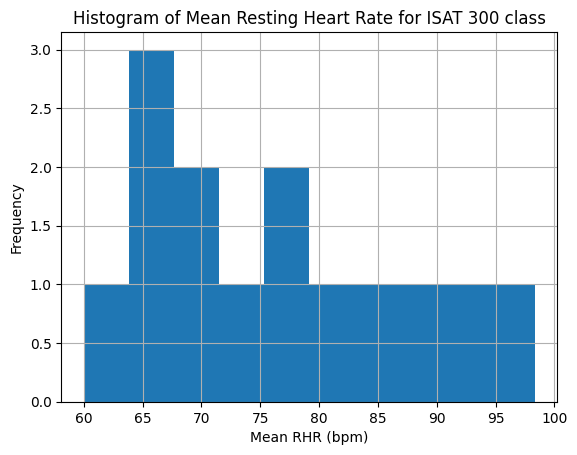

In [ ]:
# You can also try to create a histogram of the resting heart rates.
# Ask youself, which of the columns should you pick to do so.
#df.hist(column = 'MeanRHR', bins = 10)
# Try it here.

df['MeanRHR'].hist()
plt.xlabel('Mean RHR (bpm)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Resting Heart Rate for ISAT 300 class')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<font color ='blue'> <h2> Part II - Heart Rate Revocery

You need read in your heart rate data. Because it is not a lot of data, you might just want to add it manually.

**Hint: Think about how you want to treat your repetitions.**

In [ ]:
import numpy as np
import pandas as pd

# I am creating a new dataframe with some realistic data here.
# This would correspond to your measurements from the lab.

times = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]

heartrates_rep1 = [143, 137, 133, 128, 117, 111, 113, 106, 106, 102, 98, 96, 92, 96, 84, 102, 103, 99, 95]
heartrates_rep2 = [179, 176, 162, 149, 139, 141, 134, 124, 119, 119, 115, 116, 116, 113, 116, 109, 109, 111, 110]
heartrates_rep3 = [183, 177, 165, 157, 154, 141, 141, 138, 133, 133, 133, 131, 126, 128, 128, 123, 124, 123, 121]


#df_HRR = pd.read_csv('/content/lab 2 heartrates_Allie_Evan - Sheet2.csv')

print('time = %s ' % times)
df_HRR = pd.DataFrame(data={'Time (seconds)':times, 'HeartRate_1':heartrates_rep1, 'HeartRate_2':heartrates_rep2, 'HeartRate_3':heartrates_rep3}) # add your other heartrates here

print('Shape of df: (%s, %s)'  % df_HRR.shape)
df_HRR

#html_file_path = '/content/Lab_2/HRR_table.html'
#df_HRR.to_html(html_file_path, index=False)
#from google.colab import files
#files.download(html_file_path)

time = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180] 
Shape of df: (19, 4)


,Time (seconds),HeartRate_1,HeartRate_2,HeartRate_3
0,0,143,179,183
1,10,137,176,177
2,20,133,162,165
3,30,128,149,157
4,40,117,139,154
5,50,111,141,141
6,60,113,134,141
7,70,106,124,138
8,80,106,119,133
9,90,102,119,133


In [ ]:
print(df_HRR.info())

print(df_HRR.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Time (seconds)  19 non-null     int64
 1   HeartRate_1     19 non-null     int64
 2   HeartRate_2     19 non-null     int64
 3   HeartRate_3     19 non-null     int64
dtypes: int64(4)
memory usage: 740.0 bytes
None
Time (seconds)    int64
HeartRate_1       int64
HeartRate_2       int64
HeartRate_3       int64
dtype: object


In [ ]:
print('the max HR in trial 1 is: {}'.format(df_HRR['HeartRate_1'].max()))
print('the max HR in trial 2 is: {}'.format(df_HRR['HeartRate_2'].max()))
print('the max HR in trial 3 is: {}'.format(df_HRR['HeartRate_3'].max()))

mean_max_HR = (df_HRR['HeartRate_1'].max() + df_HRR['HeartRate_2'].max() + df_HRR['HeartRate_3'].max())/3
print('the mean max HR is: {}'.format(mean_max_HR))

the max HR in trial 1 is: 143
the max HR in trial 2 is: 179
the max HR in trial 3 is: 183
the mean max HR is: 168.33333333333334


In [ ]:
# calculating the average HRR of the three trials
ax_avg = (df_HRR['HeartRate_1'] + df_HRR['HeartRate_2'] + df_HRR['HeartRate_3'])/3
print(ax_avg)

0     168.333333
1     163.333333
2     153.333333
3     144.666667
4     136.666667
5     131.000000
6     129.333333
7     122.666667
8     119.333333
9     118.000000
10    115.333333
11    114.333333
12    111.333333
13    112.333333
14    109.333333
15    111.333333
16    112.000000
17    111.000000
18    108.666667
dtype: float64


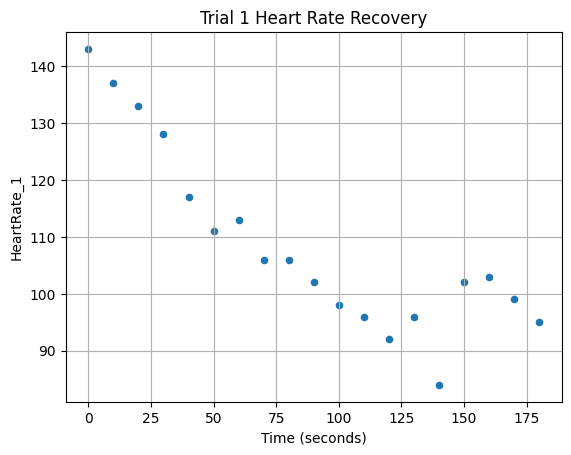

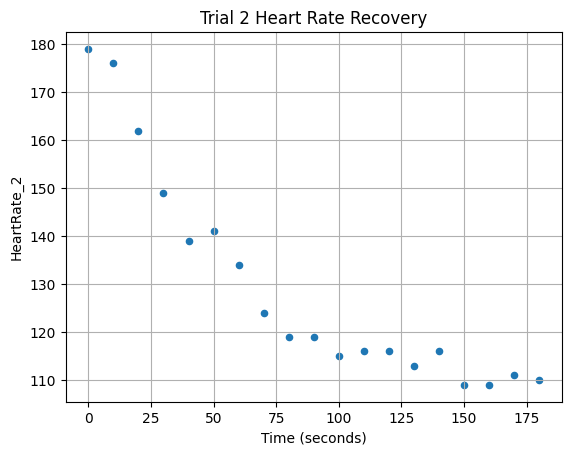

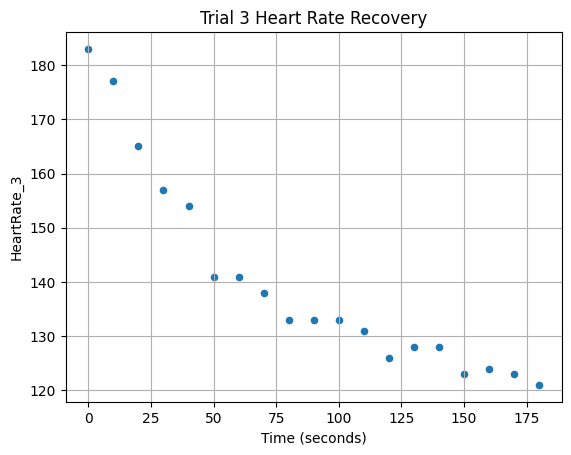

In [ ]:
# Let's just plot this really quick as a plot of Time vs HeartRate .
# Remeber how you can do this.
# Remember that we have to select the data frame with the Resting Heart Rate (df_HRR)

ax1 = df_HRR.plot(kind='scatter', x='Time (seconds)', y= 'HeartRate_1', grid = True, title = 'Trial 1 Heart Rate Recovery')
ax2 = df_HRR.plot(kind='scatter', x='Time (seconds)', y='HeartRate_2', grid = True, title = 'Trial 2 Heart Rate Recovery')
ax3 = df_HRR.plot(kind='scatter', x='Time (seconds)', y='HeartRate_3', grid = True, title = 'Trial 3 Heart Rate Recovery')

<font color ='blue'> <h2> <b> Modeling Heart Rate Recovery </b>

Having a good model, helps us make accurate predictions of a phenomenon. Bad models can be worse than having no model at all, because they lead to decisions with disatrous outcomes. A model is only as good as the underlying data. This is often called [*garbage in garbage out*](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out).

Even more important than having good data itself, is having the expertise to select a good model. A model might fit the experimental data but may show really unexpected behavior in other circumstances. **This is bad!**

<font color = 'red'/> **Q: Before we continue, what kind of model would you expect to work on this data? You have already conducted the experiement have seen the data and should have made some observations.** <font color = 'red'/>

*The kind of model we would expect to work on this data would be an exponential decay model.*

**We learned in the lecture that we need to make sure that the model we fit makes physical sense. This means we need to have an expectation on how the data behaves**.

In the case of heart rate recovery, it makes sense to think about an exponential model, where after stopping the exercise, a high heart rate rapidly declines. As the heart rate declines the rate of change will become slower.

Exponental decay can be mathematically described like this.

$Y = a + b e^{-kt}$ ,

where a, b, and k are constants and t is time.

This means we have 3 constants that can be changed around for us to find the best fit to our heart rate recovery data.         

### Option 1: Manual Fit

If you want to do a manual curve fit, you could do this here.  
I have created some code below that will help you do this. The first part defines a function in python.

```
def ExpFunction(t, a, b, k):
    y = a + b * np.exp(-k*t)
    return y
```

You should remember from your programming class, what a function. In short this function takes for arguments, calculates the value of a function, and returns the result. **You should notice that this is the same function as the one above.**

So depending on your choice of variables $a$, $b$, and $k$, you can generate estimates for the heart rate recovery.

I also supplied some code for a figure, that shows you the quality of the fit including the $R^2$. $R^2$ is the squared correlation coefficient.

An $R^2 = 1.00$ indicates a perfect correlation between two variables.

While you play around, try to notice how changing each variable changes the behavior of the curve.

**Q: What do you notice?**

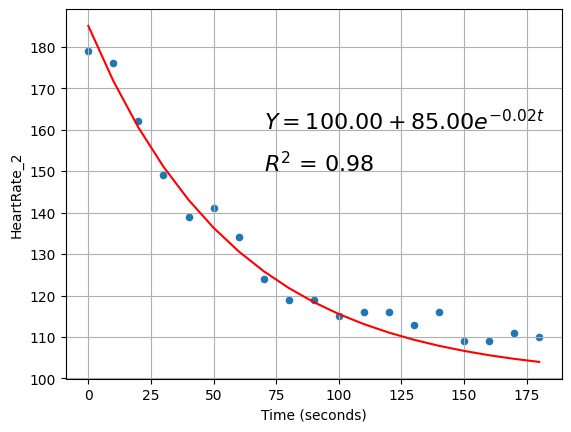

In [ ]:
# This defines a function in python that returns y for provided values
# of t, a, b, k
def ExpFunction(t, a, b, k):
  y = a + b * np.exp(-k*t)
  return y

import matplotlib.pyplot as plt

a = 100       # suggested starting value: 0
b = 85      # suggested starting value: 100
k = 0.017     # 0.1

t = df_HRR['Time (seconds)']


y_est = ExpFunction(t, a, b, k) # Here we apply the defined function from above

ax2 = df_HRR.plot(kind='scatter', x='Time (seconds)', y='HeartRate_2', grid = True)
ax2 = plt.plot(t,y_est, color = 'r')
ax2 = plt.text(70, 160, r"$Y = %3.2f +  %3.2f e^{- %3.2f t}$" % (a,b,k), fontsize = 16)
ax2 = plt.text(70, 150, r"$R^2$ = %3.2f" % (np.corrcoef(df_HRR['HeartRate_2'],y_est)[0,1])**2 , fontsize = 16)


### Option 2: Automatic curve fit using an optimizer

The [SciPy](https://scipy.org/) package in python contains a number of algorithms for scientific computing including curve fitting ([Example Here](https://www.geeksforgeeks.org/scipy-curve-fitting/)).

If we apply `curve_fit()`  to our exponential function `ExpFunction` then it returns a set of fitted parameters.  

In [ ]:
from scipy.optimize import curve_fit

# This defines a function in python that returns y for provided values
# of t, a, b, k
def ExpFunction(t, a, b, k):
  y = a + b * np.exp(-k*t)
    #y = t # You need to insert the code for the exponential function here
  return y

# trial 2
x = df_HRR['Time (seconds)']
y = df_HRR['HeartRate_2'] # You need to change this to get the correct heartrate column

# curve fit returns a list of fitted parameters
fittedParameter, variance = curve_fit(ExpFunction, x, y)
print('a= {:.2f}, b = {:.2f},  k = {:.3f}'.format(fittedParameter[0],fittedParameter[1],fittedParameter[2]))

a= 106.51, b = 77.36,  k = 0.019


We can then use the exponential function go generate estimates for y and plot these. The code is here

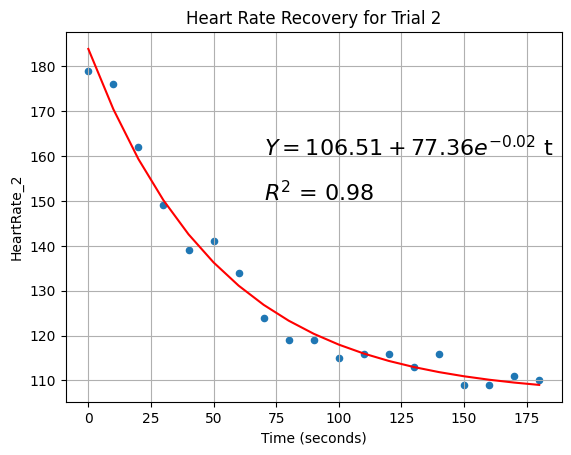

In [ ]:
y_est = ExpFunction(x,fittedParameter[0],fittedParameter[1],fittedParameter[2])

import matplotlib.pyplot as plt
ax2 = df_HRR.plot(kind='scatter', x='Time (seconds)', y='HeartRate_2', title='Heart Rate Recovery for Trial 2', grid = True)
ax2 = plt.plot(x,y_est, color = 'r')
ax2 = plt.text(70, 160, r"$Y = %3.2f +  %3.2f e^{- %3.2f }$ t" % (fittedParameter[0],fittedParameter[1],fittedParameter[2]), fontsize = 16)
ax2 = plt.text(70, 150, r"$R^2$ = %3.2f" % (np.corrcoef(y,y_est)[0,1])**2 , fontsize = 16)



---



Trial 1: a = 92.31, b = 54.11, k = 0.019
Trial 3: a = 120.69, b = 64.20, k = 0.019


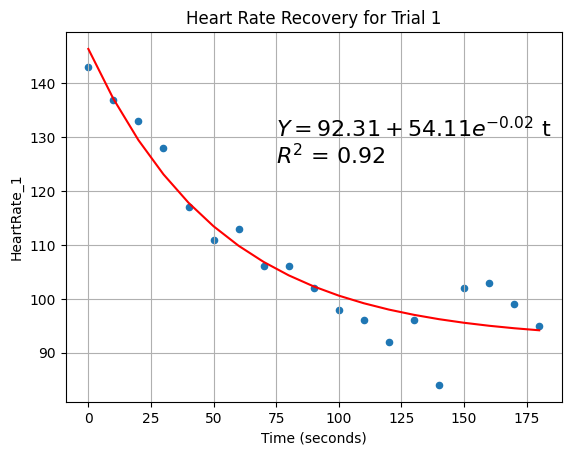

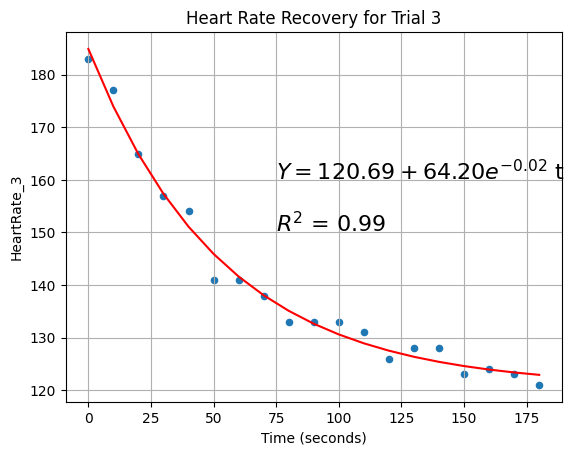

In [ ]:
# I used this website for help with fitting the curve for trial 1 and 3
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

def ExpFunction(t, a, b, k):
  y = a + b * np.exp(-k * t)
  return y

# setting parameters for a, b, k
bounds = ([50, 50, 0], [200, 200, 1])
# a (resting HR) between 50 and 200
# b (HR max - HR rest) between 50 and 200
# k between 0 and 1

# trial 1
x = df_HRR['Time (seconds)']
y = df_HRR['HeartRate_1']
# adding initial guess/starting values for a, b, k
initial_guess = [76, mean_max_HR, 0.02]
# our RHR were 73, 77, 77
# so our mean is 75.667

# curve fitting
fittedParameter, variance = curve_fit(ExpFunction, x, y, p0=initial_guess, bounds=bounds, maxfev=10000)
print('Trial 1: a = {:.2f}, b = {:.2f}, k = {:.3f}'.format(fittedParameter[0], fittedParameter[1], fittedParameter[2]))
y_est = ExpFunction(x, fittedParameter[0], fittedParameter[1], fittedParameter[2])

# plt trial 1
ax1 = df_HRR.plot(kind='scatter', x='Time (seconds)', y='HeartRate_1', title='Heart Rate Recovery for Trial 1', grid = True)
ax1 = plt.plot(x, y_est, color = 'r')
ax1 = plt.text(75, 130, r"$Y = %3.2f +  %3.2f e^{- %3.2f }$ t" % (fittedParameter[0],fittedParameter[1],fittedParameter[2]), fontsize = 16)
ax1 = plt.text(75, 125, r"$R^2$ = %3.2f" % (np.corrcoef(y, y_est)[0,1]) **2 , fontsize = 16)








# trial 3
y = df_HRR['HeartRate_3']
initial_guess = [y.min(), y.max() - y.min(), 0.01]

# curve fitting
fittedParameter, variance = curve_fit(ExpFunction, x, y, p0=initial_guess, maxfev=2000)
print('Trial 3: a = {:.2f}, b = {:.2f}, k = {:.3f}'.format(fittedParameter[0], fittedParameter[1], fittedParameter[2]))
y_est = ExpFunction(x, fittedParameter[0], fittedParameter[1], fittedParameter[2])

# plt trial 3
ax3 = df_HRR.plot(kind='scatter', x='Time (seconds)', y='HeartRate_3', title='Heart Rate Recovery for Trial 3', grid = True)
ax3 = plt.plot(x, y_est, color = 'r')
ax3 = plt.text(75, 160, r"$Y = %3.2f +  %3.2f e^{- %3.2f }$ t" % (fittedParameter[0],fittedParameter[1],fittedParameter[2]), fontsize = 16)
ax3 = plt.text(75, 150, r"$R^2$ = %3.2f" % (np.corrcoef(y, y_est)[0,1]) **2 , fontsize = 16)


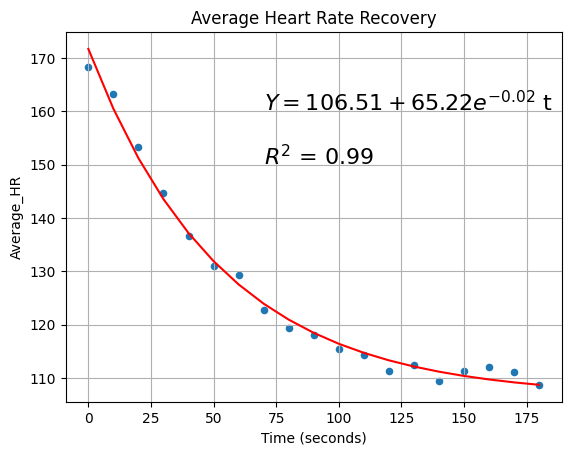

In [ ]:
# avg of the trials
def ExpFunction(t, a, b, k):
  y = a + b * np.exp(-k * t)
  return y

df_HRR['Average_HR'] = (df_HRR['HeartRate_1'] + df_HRR['HeartRate_2'] + df_HRR['HeartRate_3'])/3

x = df_HRR['Time (seconds)']
y = np.array(df_HRR['Average_HR'])

# curve fitting
fittedParameter, variance = curve_fit(ExpFunction, x, y, maxfev=10000)
y_est = ExpFunction(x, fittedParameter[0], fittedParameter[1], fittedParameter[2])

# plt avg HR
ax_avg = df_HRR.plot(kind='scatter', x='Time (seconds)', y= 'Average_HR', title='Average Heart Rate Recovery', grid = True)
ax_avg = plt.plot(x, y_est, color = 'r')
ax_avg = plt.text(70, 160, r"$Y = %3.2f +  %3.2f e^{- %3.2f }$ t" % (fittedParameter[0],fittedParameter[1],fittedParameter[2]), fontsize = 16)
ax_avg = plt.text(70, 150, r"$R^2$ = %3.2f" % (np.corrcoef(y, y_est)[0,1]) **2 , fontsize = 16)